In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [2]:
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',skiprows=[0])
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=[0])
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',skiprows=[0])

In [3]:
def preprocessing(df):
    """"
    Objective :
    Function for preprocessing data, known missing, duplicated values and basic stastics every column in dataframe and duplicated row
    df is dataframe
    """
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Null','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].isnull().sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

In [4]:
preprocessing(Transactions)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
transaction_id,20000,0.000,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
product_id,101,0.000,0,int64,"[2, 3, 37, 88, 78, 25, 22, 15, 67, 12, 5, 61, ..."
customer_id,3494,0.000,0,int64,"[2950, 3120, 402, 3135, 787, 2339, 1542, 2459,..."
transaction_date,364,0.000,0,datetime64[ns],"[2017-02-25T00:00:00.000000000, 2017-05-21T00:..."
online_order,2,1.800,360,float64,"[0.0, 1.0, nan]"
order_status,2,0.000,0,object,"[Approved, Cancelled]"
brand,6,0.985,197,object,"[Solex, Trek Bicycles, OHM Cycles, Norco Bicyc..."
product_line,4,0.985,197,object,"[Standard, Road, Mountain, Touring, nan]"
product_class,3,0.985,197,object,"[medium, low, high, nan]"


In [5]:
preprocessing(CustomerAddress)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
customer_id,3999,0.0,0,int64,"[1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1..."
address,3996,0.0,0,object,"[060 Morning Avenue, 6 Meadow Vale Court, 0 Ho..."
postcode,873,0.0,0,int64,"[2016, 2153, 4211, 2448, 3216, 2210, 2650, 202..."
state,5,0.0,0,object,"[New South Wales, QLD, VIC, NSW, Victoria]"
country,1,0.0,0,object,[Australia]
property_valuation,12,0.0,0,int64,"[10, 9, 4, 12, 8, 6, 7, 3, 5, 11, 1, 2]"


In [6]:
preprocessing(CustomerDemographic)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
customer_id,4000,0.000,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
first_name,3139,0.000,0,object,"[Laraine, Eli, Arlin, Talbot, Sheila-kathryn, ..."
last_name,3725,3.125,125,object,"[Medendorp, Bockman, Dearle, nan, Calton, Duck..."
gender,6,0.000,0,object,"[F, Male, Female, U, Femal, M]"
past_3_years_bike_related_purchases,100,0.000,0,int64,"[93, 81, 61, 33, 56, 35, 6, 31, 97, 49, 99, 58..."
DOB,3448,2.175,87,datetime64[ns],"[1953-10-12T00:00:00.000000000, 1980-12-16T00:..."
job_title,195,12.650,506,object,"[Executive Secretary, Administrative Officer, ..."
job_industry_category,9,16.400,656,object,"[Health, Financial Services, Property, IT, nan..."
wealth_segment,3,0.000,0,object,"[Mass Customer, Affluent Customer, High Net Wo..."


## Transaction

In [7]:
Transactions = Transactions[Transactions['order_status']=='Approved']

<AxesSubplot:xlabel='transaction_date', ylabel='list_price'>

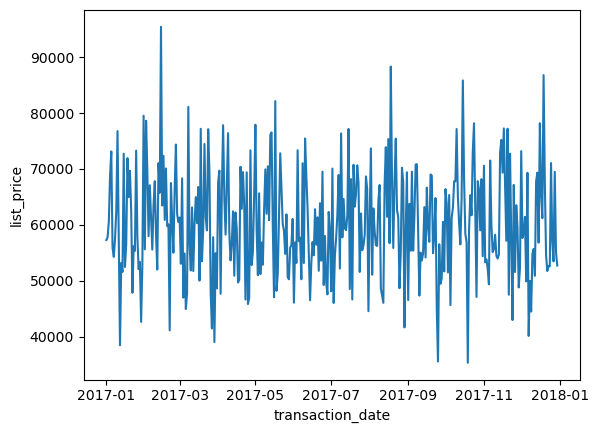

In [8]:
trans = Transactions.groupby(['transaction_date'])['list_price'].sum().reset_index()
sns.lineplot(x='transaction_date',y='list_price',data=trans)

Daily sales tend to be stagnant

In [9]:
import datetime as dt
Transactions['month'] = Transactions['transaction_date'].dt.month

<AxesSubplot:xlabel='month', ylabel='list_price'>

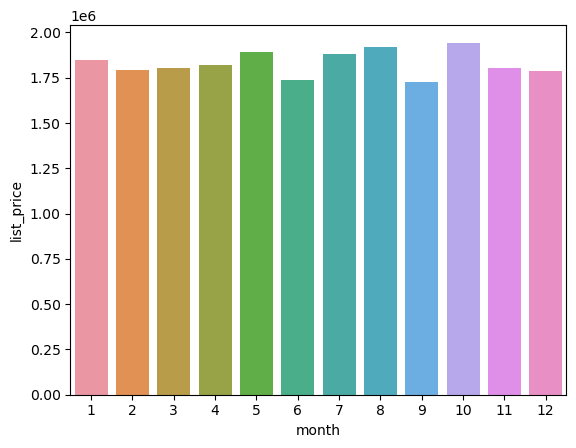

In [10]:
trans = Transactions.groupby(['month'])['list_price'].sum().reset_index()
sns.barplot(x='month',y='list_price',data=trans)

April and September is the least sales in month

In [11]:
trans = Transactions.groupby(['transaction_date'])['list_price'].sum().reset_index()

In [12]:
from prophet import Prophet
y = trans
y.columns = ['ds', 'y']
train = y
m = Prophet()
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
test = pd.read_csv('test.csv')

In [14]:
test['ds'] = pd.to_datetime(test['ds'])

In [15]:
future = m.make_future_dataframe(periods=len(test))

In [16]:
forecast = m.predict(future)

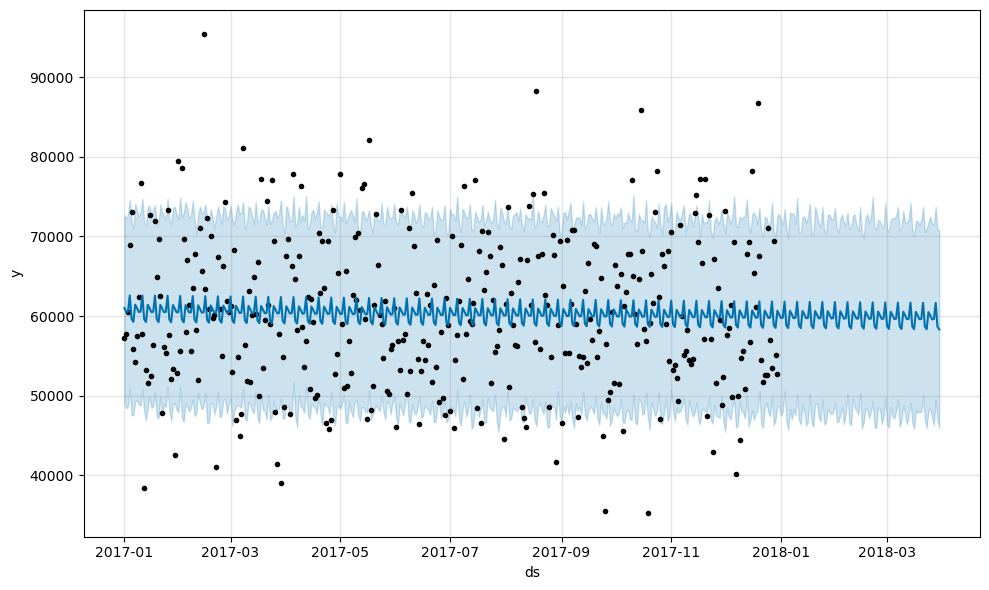

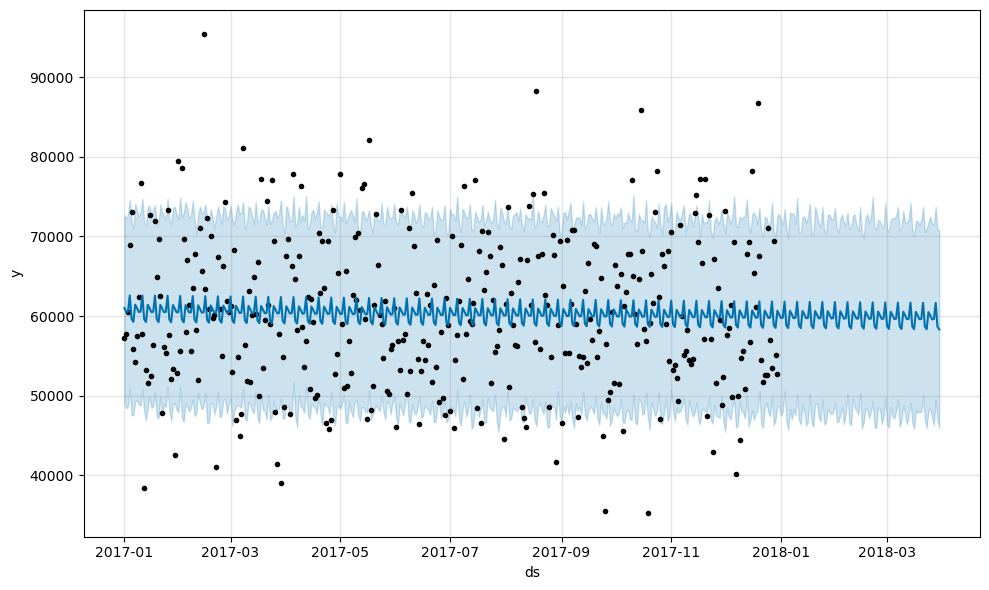

In [17]:
m.plot(forecast)

with forecasting, sales can be stagnant 

In [18]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'month'],
      dtype='object')

<AxesSubplot:xlabel='brand', ylabel='list_price'>

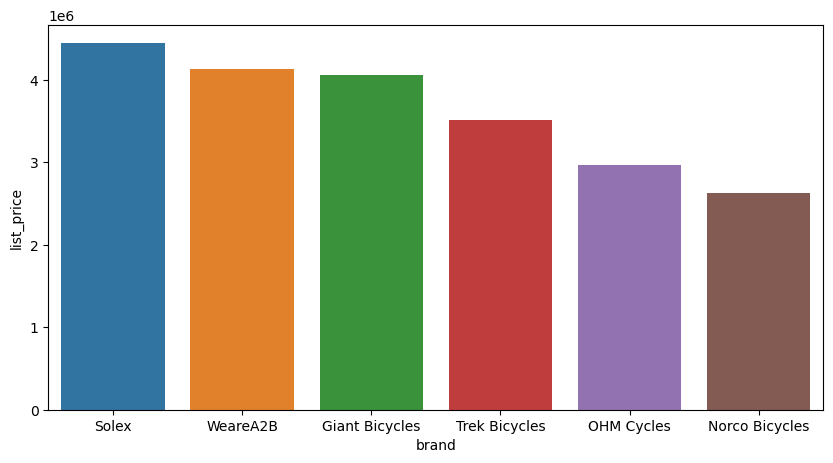

In [19]:
brand = Transactions.groupby('brand')['list_price'].sum().reset_index().sort_values('list_price',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='brand',y='list_price',data=brand)

Solex, Giant Bicycles and WeareA2B is brand with biggest revenue

In [20]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'month'],
      dtype='object')

<AxesSubplot:xlabel='brand', ylabel='profit'>

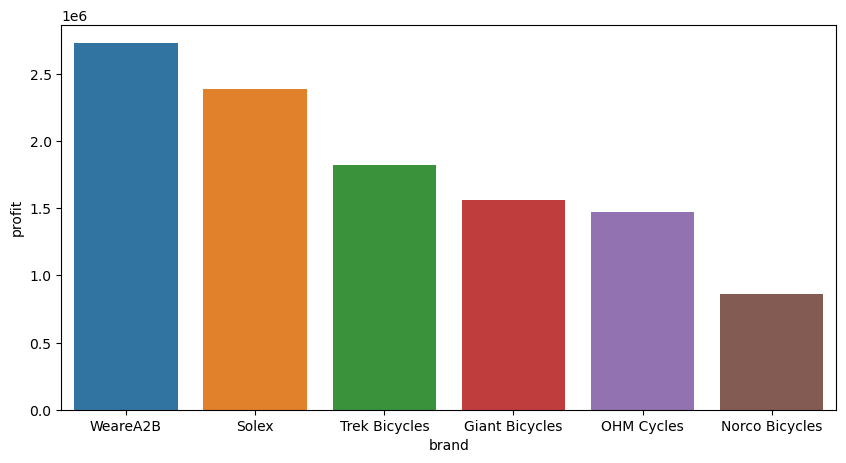

In [21]:
Transactions['profit'] = Transactions['list_price'] - Transactions['standard_cost']
brand = Transactions.groupby('brand')['profit'].sum().reset_index().sort_values('profit',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='brand',y='profit',data=brand)

Higher revenue tend to be high profit

<AxesSubplot:xlabel='brand', ylabel='%profit'>

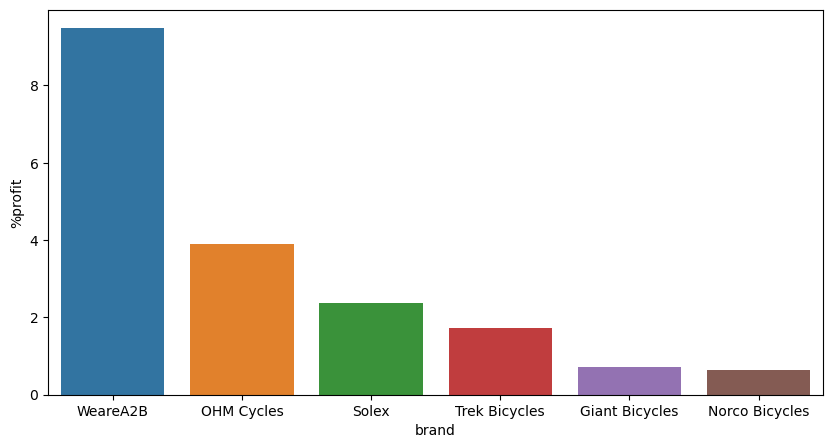

In [22]:
Transactions['%profit'] = (Transactions['list_price'] - Transactions['standard_cost'])/Transactions['standard_cost']
brand = Transactions.groupby('brand')['%profit'].mean().reset_index().sort_values('%profit',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='brand',y='%profit',data=brand)

WeareA2B is highest profitable brand

## Customer Geography

In [23]:
table_agg = Transactions.merge(CustomerAddress,how='left',on='customer_id')

In [24]:
table_agg.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'month', 'profit', '%profit', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

<AxesSubplot:xlabel='state', ylabel='list_price'>

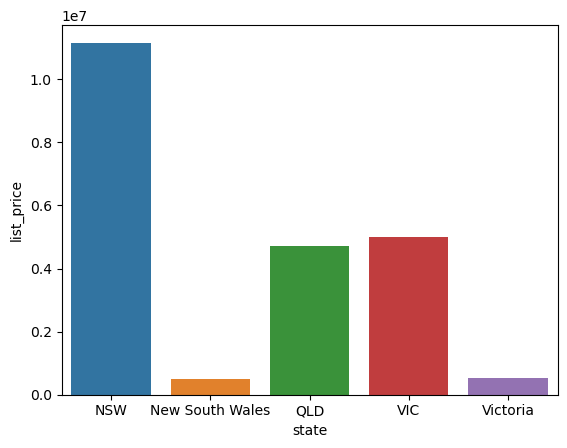

In [25]:
geography = table_agg.groupby('state')['list_price'].sum().reset_index()
sns.barplot(x='state',y='list_price',data=geography)

In [26]:
table_agg

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,standard_cost,product_first_sold_date,month,profit,%profit,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,53.62,41245.0,2,17.87,0.333271,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,388.92,41701.0,5,1702.55,4.377636,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,248.82,36361.0,10,1544.61,6.207741,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,381.10,36145.0,8,817.36,2.144739,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,709.48,42226.0,10,1055.82,1.488160,0601 Stephen Place,2292.0,NSW,Australia,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19816,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,1203.40,37823.0,6,802.26,0.666661,3 Hayes Court,3109.0,VIC,Australia,10.0
19817,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,312.74,35560.0,11,104.24,0.333312,0 Pearson Crossing,4405.0,QLD,Australia,1.0
19818,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,44.71,40410.0,4,1592.19,35.611496,10055 Old Shore Lane,3630.0,VIC,Australia,1.0
19819,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,136.73,38216.0,7,91.15,0.666642,1 Wayridge Park,4301.0,QLD,Australia,1.0


## Customer Demographic

In [27]:
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])

In [28]:
CustomerDemographic['age'] = 2022 - CustomerDemographic['DOB'].dt.year

In [29]:
CustomerDemographic['age'].describe()

count    3913.000000
mean       44.969333
std        12.796387
min        20.000000
25%        35.000000
50%        45.000000
75%        54.000000
max       179.000000
Name: age, dtype: float64

Customer have 179 years?

In [30]:
CustomerDemographic = CustomerDemographic[~(CustomerDemographic['age'] > 100)]

In [31]:
table_agg = table_agg.merge(CustomerDemographic,how='left',on='customer_id')

In [32]:
table_agg.drop('default',axis=1,inplace=True)

In [33]:
table_agg.groupby('job_title')['list_price'].sum().reset_index()[:10]

,job_title,list_price
0,Account Coordinator,153039.91
1,Account Executive,170210.32
2,Account Representative I,51622.60
3,Account Representative II,16262.38
4,Account Representative III,34862.87
5,Account Representative IV,59213.36
6,Accountant I,43409.78
7,Accountant II,27763.67
8,Accountant III,40844.24
9,Accountant IV,72951.70


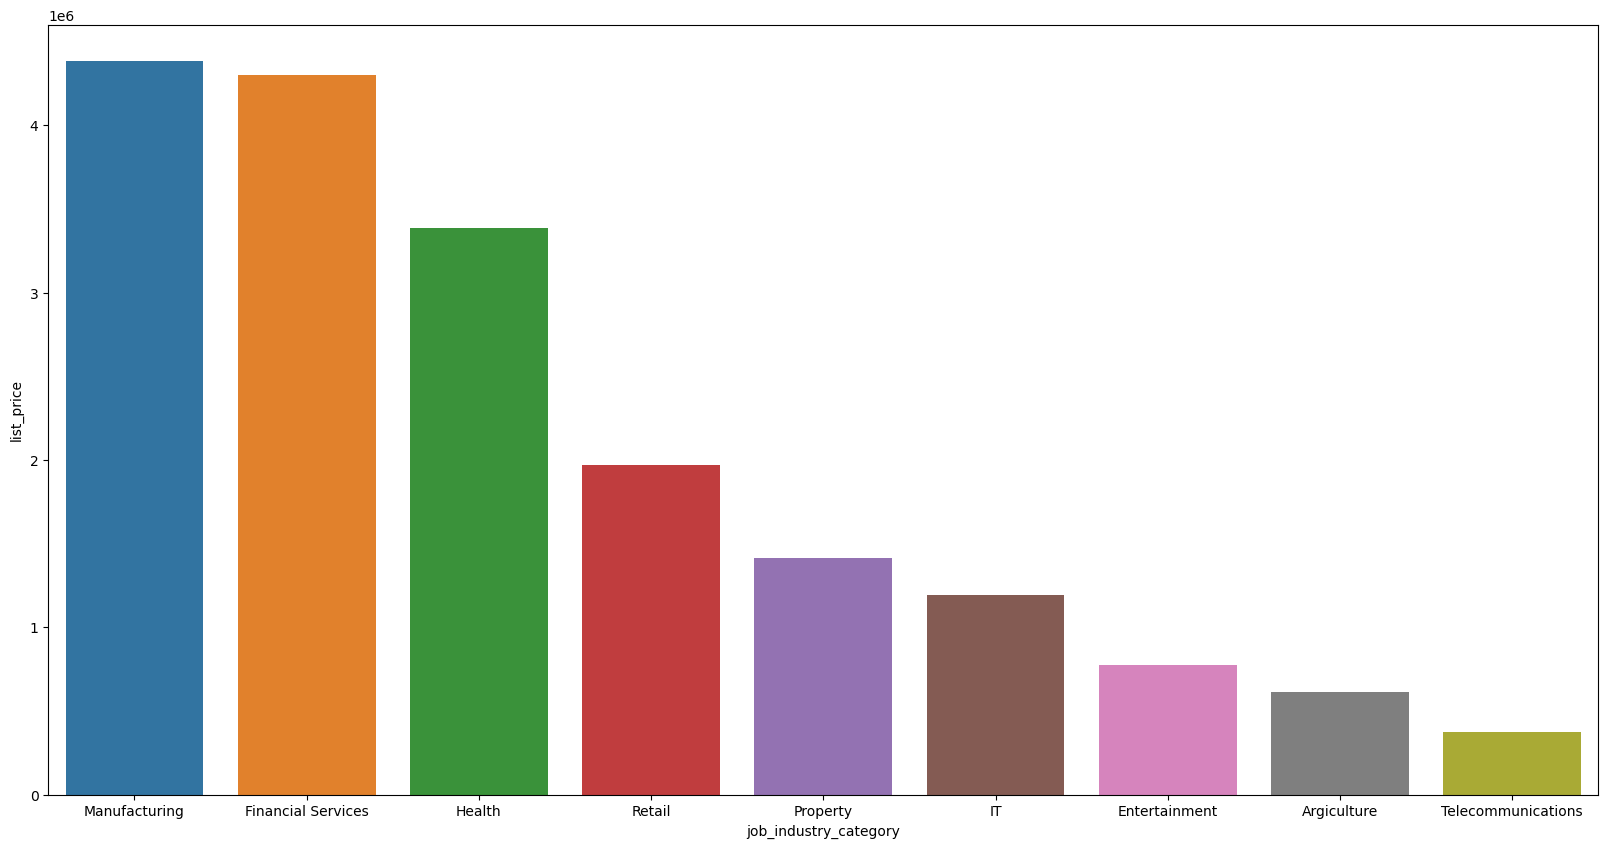

In [34]:
job_industry = table_agg.groupby('job_industry_category')['list_price'].sum().reset_index().sort_values('list_price',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='job_industry_category',y='list_price',data=job_industry)
plt.show()

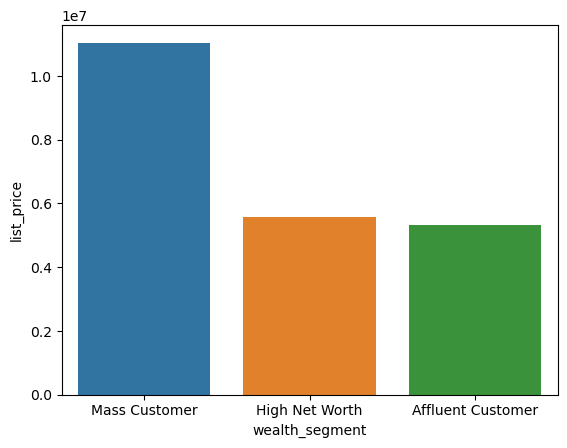

In [35]:
wealth_segment = table_agg.groupby('wealth_segment')['list_price'].sum().reset_index().sort_values('list_price',ascending=False)

sns.barplot(x='wealth_segment',y='list_price',data=wealth_segment)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

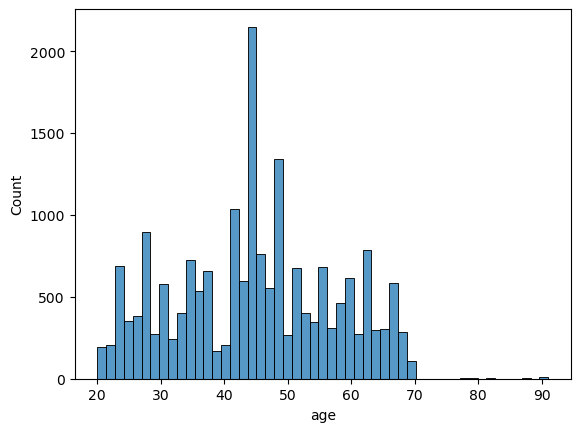

In [36]:
sns.histplot(table_agg['age'])

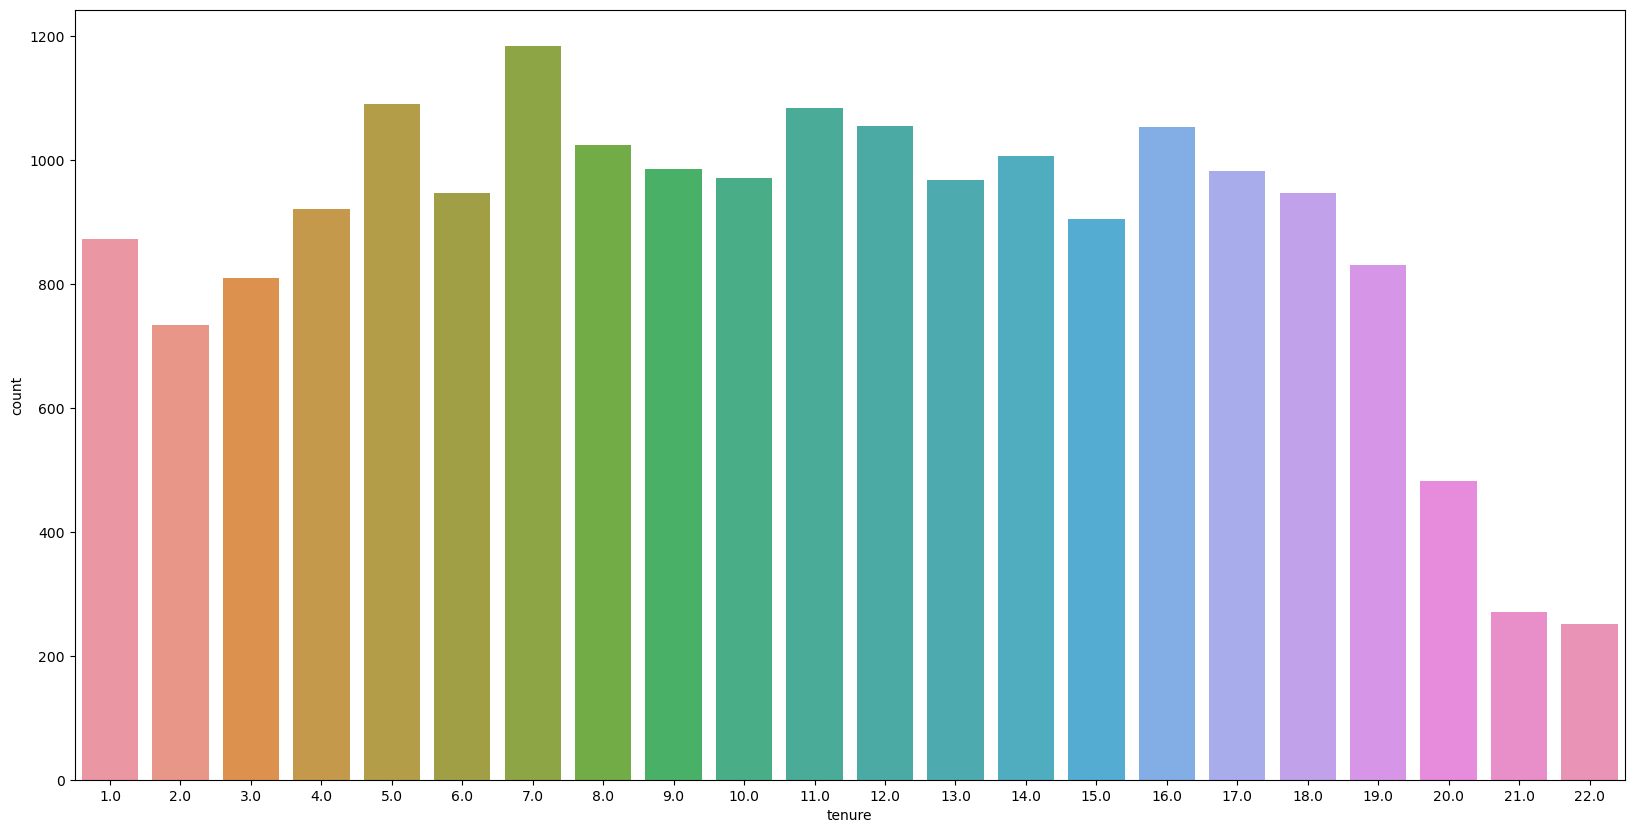

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(table_agg['tenure'])
plt.show()

# Feature Selection

In [38]:
pd.DataFrame({'Demographic':['age','job_industry_category'],
             'Geographic':['state',''],'Psychographic':['wealth_segment',''],
             'Behavioral':['frequency','monetary']})

,Demographic,Geographic,Psychographic,Behavioral
0,age,state,wealth_segment,frequency
1,job_industry_category,,,monetary


# Feature Engineering

In [39]:
model_table = table_agg.groupby('customer_id')['list_price'].sum().reset_index()
model_table.columns = ['customer_id','monetary']

In [40]:
frequency = table_agg.groupby('customer_id')['transaction_id'].count().reset_index()

In [41]:
frequency['frequency'] = frequency['transaction_id']
frequency.drop('transaction_id',axis=1,inplace=True)

In [42]:
max_date = max(table_agg['transaction_date'])
recency = table_agg.groupby('customer_id')['transaction_date'].max().reset_index()
recency['recency'] = recency['transaction_date'].apply(lambda x:(max_date-x).days)

In [43]:
model_table = model_table.merge(recency,how='left',on='customer_id')

In [44]:
model_table = model_table.merge(frequency,how='left',on='customer_id')

In [45]:
age = CustomerDemographic.groupby('customer_id')['age'].sum().reset_index()

In [46]:
model_table = model_table.merge(age,how='left',on='customer_id')

In [47]:
model_table = model_table.merge(CustomerAddress[['customer_id','state']],how='left',on='customer_id')

In [48]:
model_table = model_table.merge(CustomerDemographic[['customer_id','wealth_segment']],how='left',on='customer_id')

In [49]:
model_table = model_table.merge(CustomerDemographic[['customer_id','job_industry_category']],how='left',on='customer_id')

# Data Preprocessing

In [50]:
preprocessing(model_table)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
customer_id,3493,0.000000,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
monetary,3470,0.000000,0,float64,"[9084.45, 4149.07, 9888.23, 1047.72, 5903.2, 5..."
transaction_date,277,0.000000,0,datetime64[ns],"[2017-12-23T00:00:00.000000000, 2017-08-24T00:..."
recency,277,0.000000,0,int64,"[7, 128, 102, 195, 16, 64, 253, 22, 78, 33, 46..."
frequency,14,0.000000,0,int64,"[11, 3, 8, 2, 6, 5, 10, 7, 4, 12, 9, 1, 13, 14]"
age,56,0.057257,2,float64,"[69.0, 42.0, 68.0, 61.0, 45.0, 56.0, 46.0, 60...."
state,5,0.143143,5,object,"[New South Wales, nan, QLD, VIC, NSW, Victoria]"
wealth_segment,3,0.057257,2,object,"[Mass Customer, Affluent Customer, High Net Wo..."
job_industry_category,9,16.117950,563,object,"[Health, Financial Services, Property, IT, nan..."


In [51]:
model_table['monetary'].describe().reset_index().to_excel('monetary.xlsx')

age, state and wealth_segment have null values

In [52]:
numerical = ['monetary','frequency','age','recency']
categorical = ['state','wealth_segment','job_industry_category']

In [53]:
model_table[numerical].describe()

,monetary,frequency,age,recency
count,3493.000000,3493.000000,3491.000000,3493.000000
mean,6285.198022,5.674492,43.853910,61.230461
std,2941.998917,2.311440,14.064195,57.971602
min,60.340000,1.000000,0.000000,0.000000
25%,4162.960000,4.000000,34.000000,17.000000
50%,5974.770000,6.000000,45.000000,44.000000
75%,8157.720000,7.000000,54.000000,86.000000
max,19071.320000,14.000000,91.000000,353.000000


In [54]:
model_table[categorical].describe()

,state,wealth_segment,job_industry_category
count,3488,3491,2930
unique,5,3,9
top,NSW,Mass Customer,Manufacturing
freq,1779,1747,702


## Handling Duplicate Data

In [55]:
model_table.duplicated(subset='customer_id').sum()

0

In [56]:
model_table.drop('customer_id',axis=1).duplicated().sum()

0

## Handling Missing Value

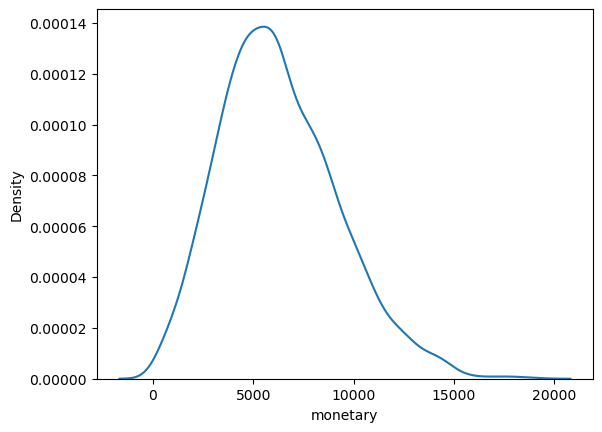

<Figure size 300x300 with 0 Axes>

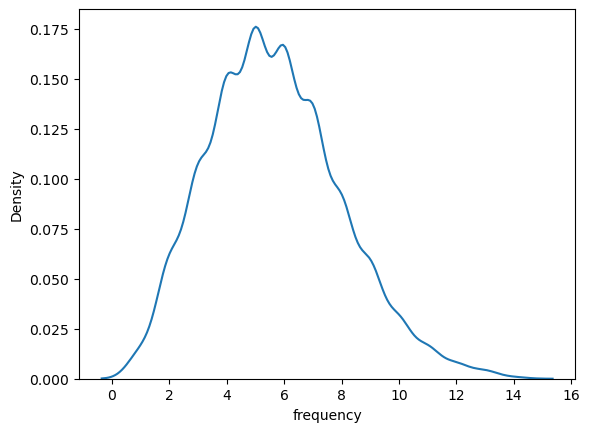

<Figure size 300x300 with 0 Axes>

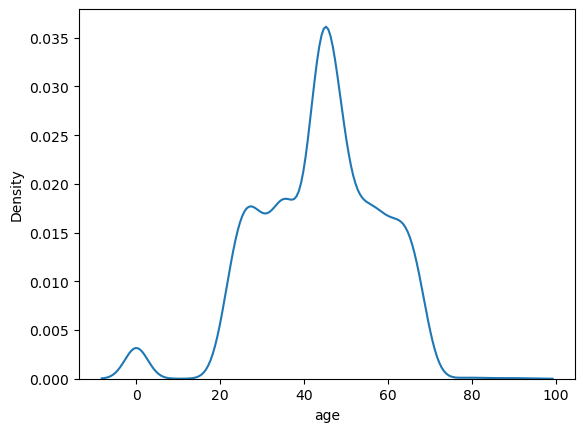

<Figure size 300x300 with 0 Axes>

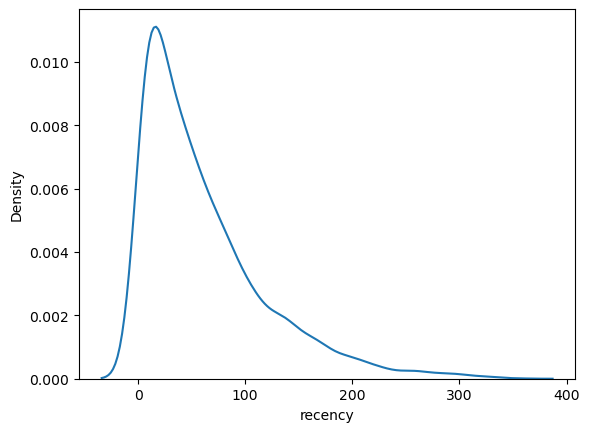

<Figure size 300x300 with 0 Axes>

In [57]:
for j in range (0,len(numerical)):
    num = numerical[j]
    sns.kdeplot(x=model_table[num])
    plt.figure(figsize=(3,3))
    plt.show()

Numerical Feature mostly have distribution normally

In [58]:
model_table['age'] = model_table['age'].replace(0,model_table['age'].median())

<AxesSubplot:xlabel='age', ylabel='Density'>

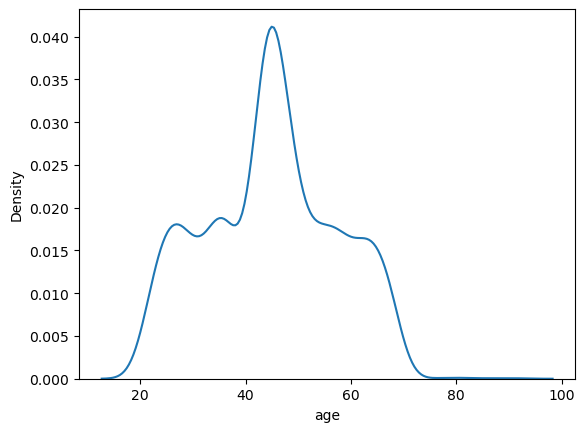

In [59]:
sns.kdeplot(model_table['age'])

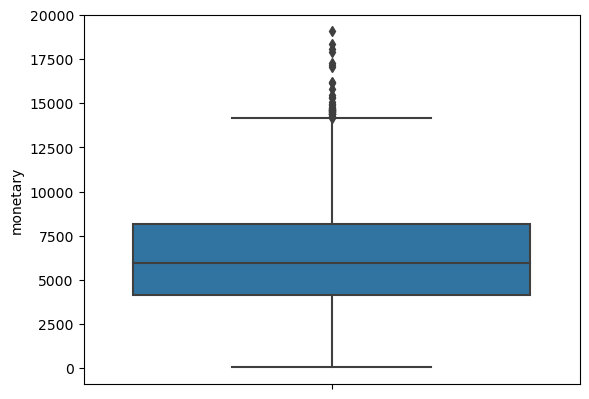

<Figure size 300x300 with 0 Axes>

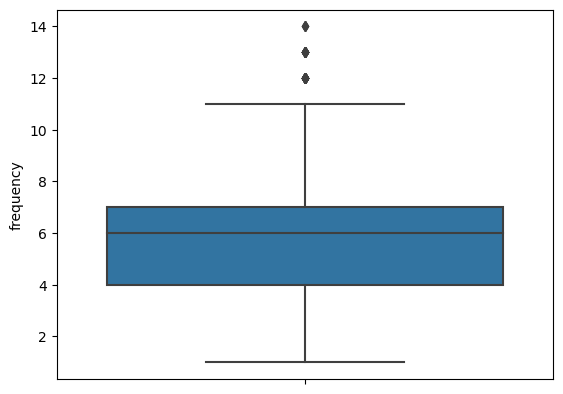

<Figure size 300x300 with 0 Axes>

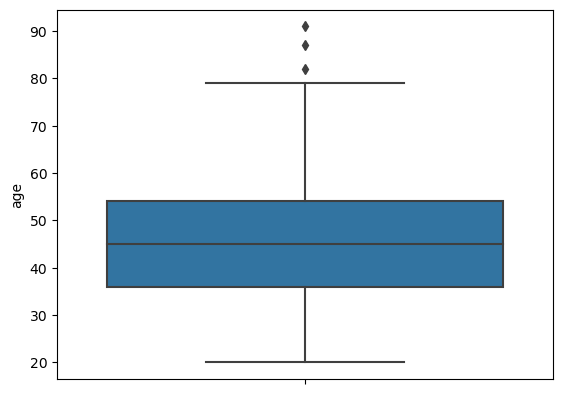

<Figure size 300x300 with 0 Axes>

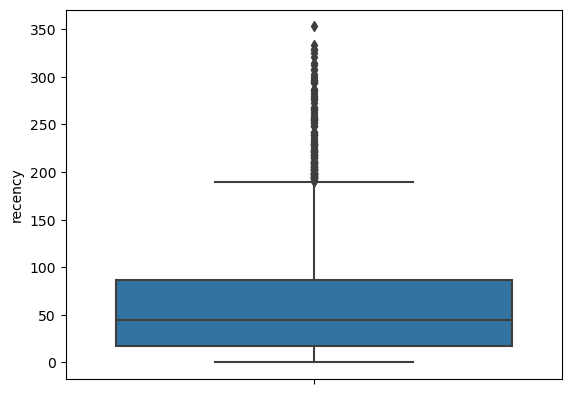

<Figure size 300x300 with 0 Axes>

In [60]:
for j in range (0,len(numerical)):
    num = numerical[j]
    sns.boxplot(y=model_table[num])
    plt.figure(figsize=(3,3))
    plt.show()

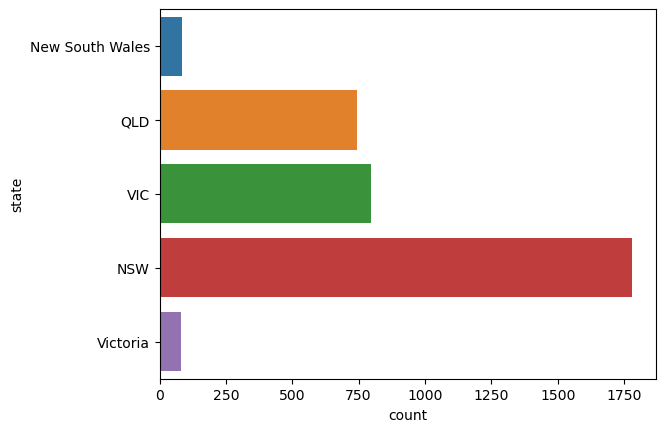

<Figure size 2000x500 with 0 Axes>

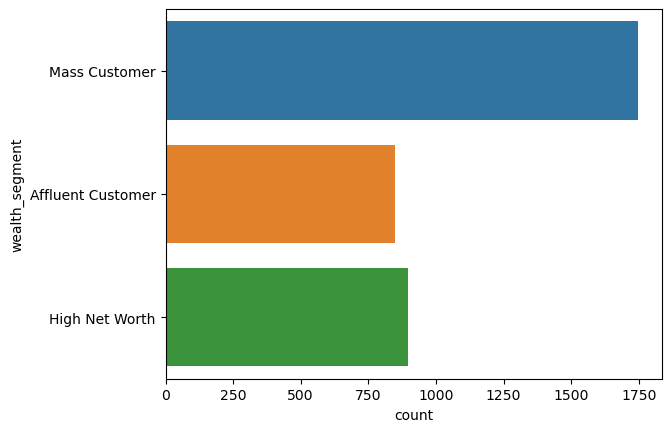

<Figure size 2000x500 with 0 Axes>

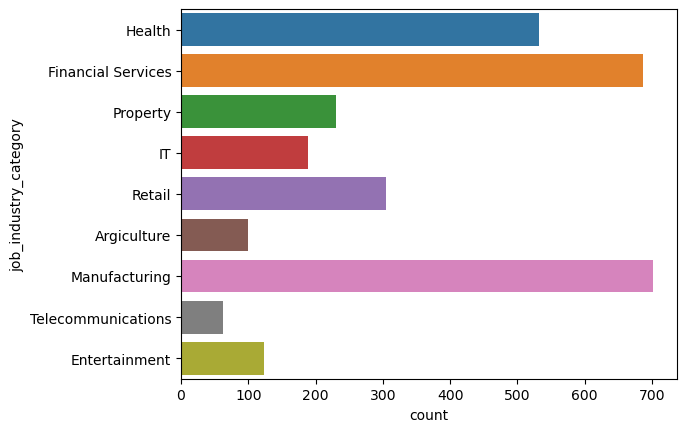

<Figure size 2000x500 with 0 Axes>

In [61]:
for j in range (0,len(categorical)):
    num = categorical[j]
    sns.countplot(y=model_table[num])
    plt.figure(figsize=(20,5))
    plt.show()

In [62]:
model_table[numerical] = model_table[numerical].fillna(model_table[numerical].median())

In [63]:
model_table['state'] = model_table['state'].fillna('NSW')
model_table['wealth_segment'] = model_table['wealth_segment'].fillna('Mass Customer')
model_table['job_industry_category'] = model_table['job_industry_category'].fillna('Manufacturing')

In [64]:
preprocessing(model_table)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
customer_id,3493,0.0,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
monetary,3470,0.0,0,float64,"[9084.45, 4149.07, 9888.23, 1047.72, 5903.2, 5..."
transaction_date,277,0.0,0,datetime64[ns],"[2017-12-23T00:00:00.000000000, 2017-08-24T00:..."
recency,277,0.0,0,int64,"[7, 128, 102, 195, 16, 64, 253, 22, 78, 33, 46..."
frequency,14,0.0,0,int64,"[11, 3, 8, 2, 6, 5, 10, 7, 4, 12, 9, 1, 13, 14]"
age,55,0.0,0,float64,"[69.0, 42.0, 68.0, 61.0, 45.0, 56.0, 46.0, 60...."
state,5,0.0,0,object,"[New South Wales, NSW, QLD, VIC, Victoria]"
wealth_segment,3,0.0,0,object,"[Mass Customer, Affluent Customer, High Net Wo..."
job_industry_category,9,0.0,0,object,"[Health, Financial Services, Property, IT, Man..."


## Scaling

In [65]:
model = model_table.copy()

In [66]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(model['monetary'].values.reshape(-1, 1))
model['monetary'] = scaler.transform(model['monetary'].values.reshape(-1, 1))
scaler = preprocessing.MinMaxScaler()
scaler.fit(model['frequency'].values.reshape(-1, 1))
model['frequency'] = scaler.transform(model['frequency'].values.reshape(-1, 1))
scaler = preprocessing.MinMaxScaler()
scaler.fit(model['age'].values.reshape(-1, 1))
model['age'] = scaler.transform(model['age'].values.reshape(-1, 1))
scaler = preprocessing.StandardScaler()
scaler.fit(model['age'].values.reshape(-1, 1))
model['recency'] = scaler.transform(model['recency'].values.reshape(-1, 1))

In [67]:
def onehot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [68]:
model = onehot_encode(model,categorical)

In [69]:
model = model.drop('customer_id',axis=1)

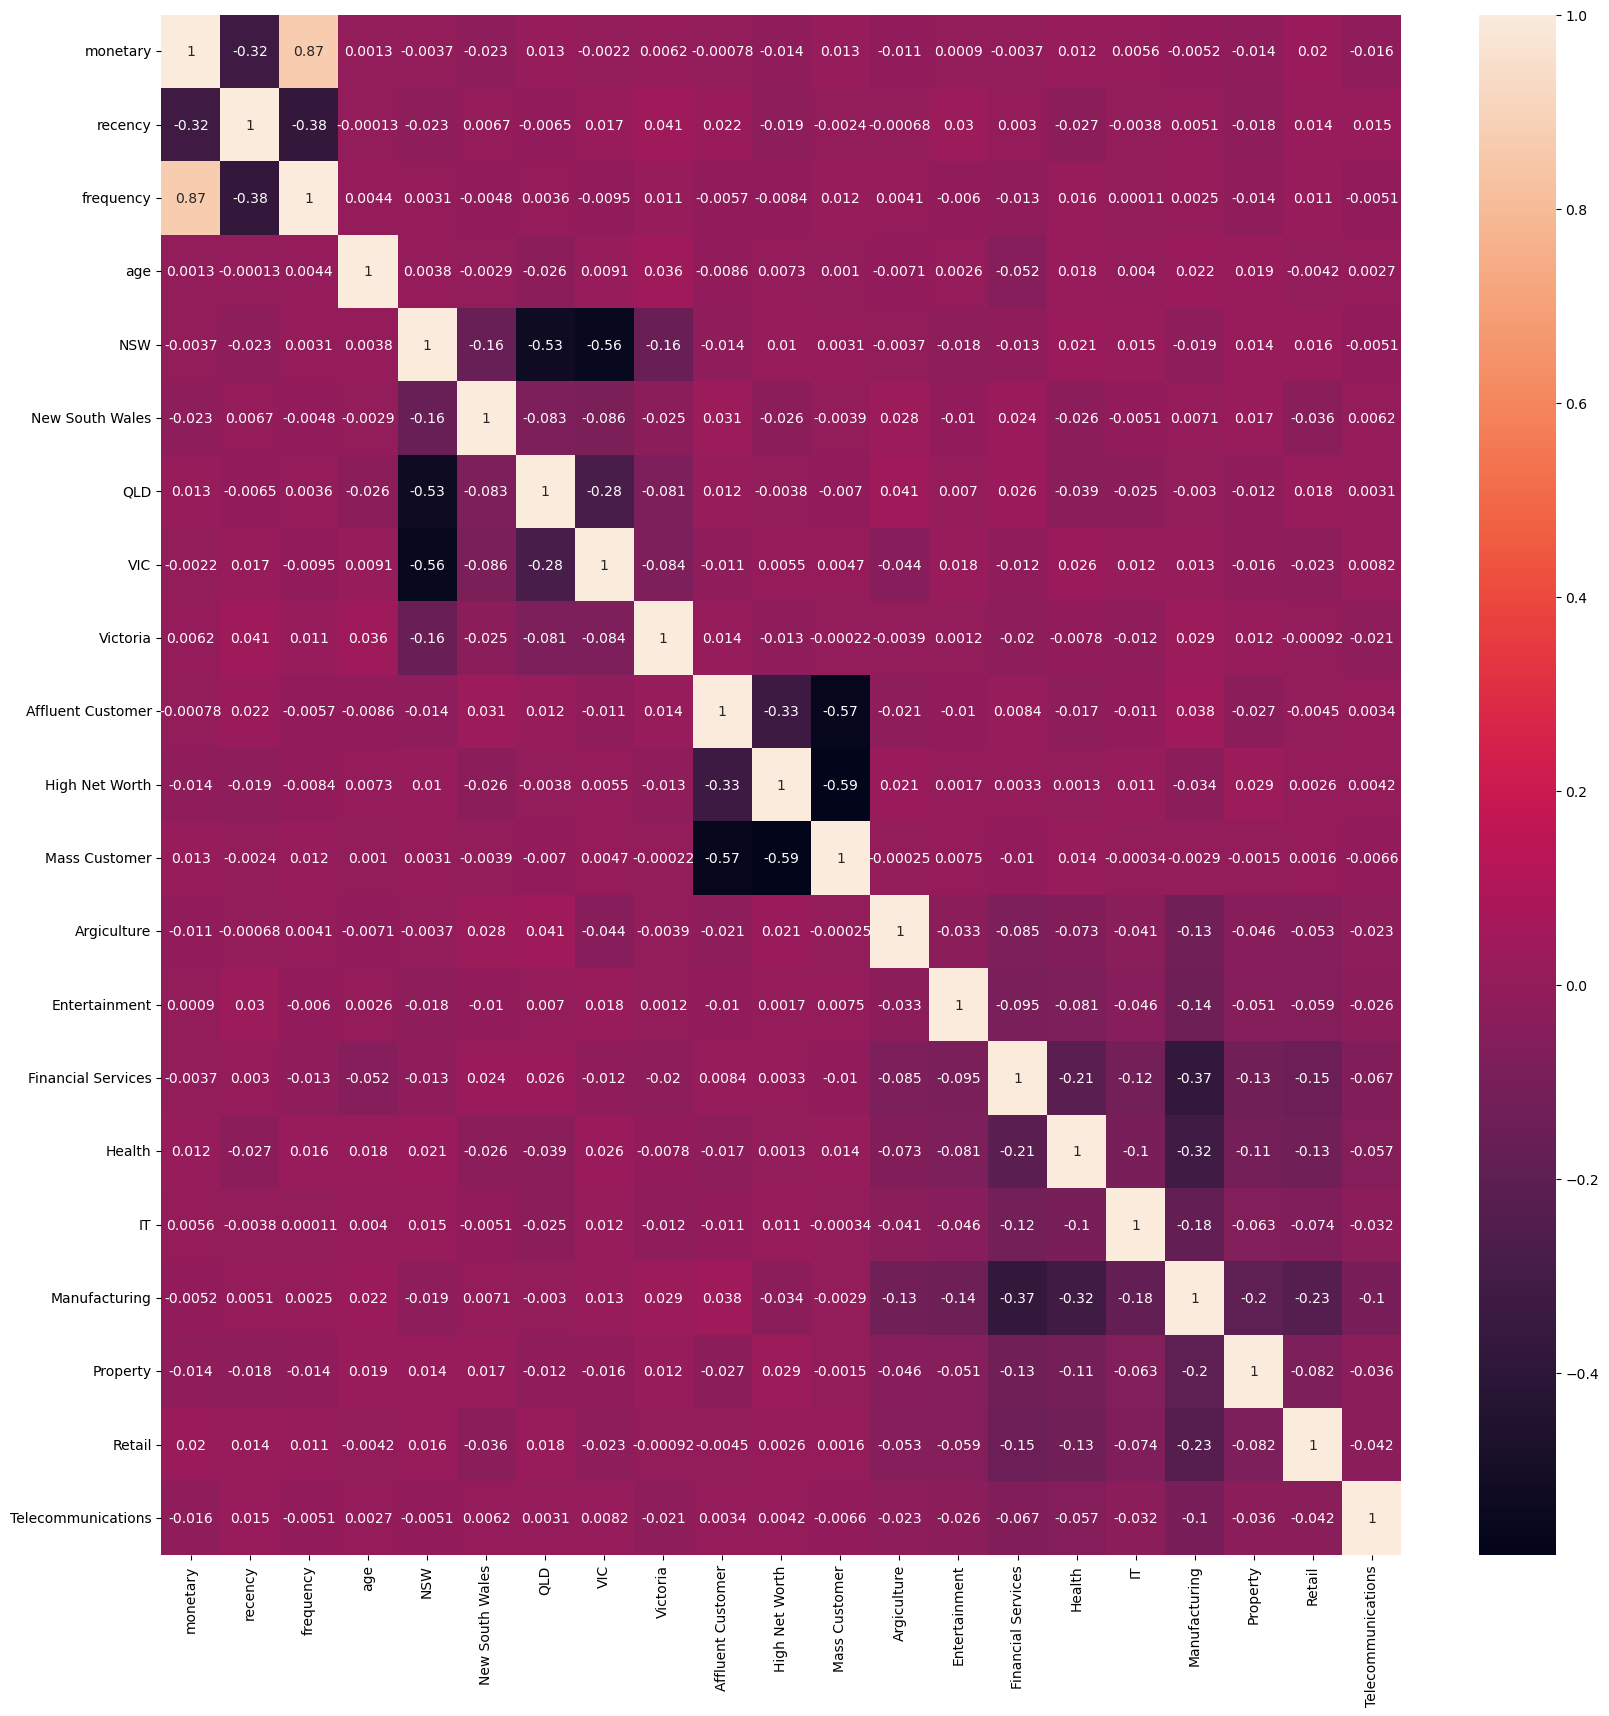

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = model.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True)
plt.show()

In [71]:
model.drop('frequency',axis=1,inplace=True)

In [72]:
model.drop('transaction_date',axis=1,inplace=True)

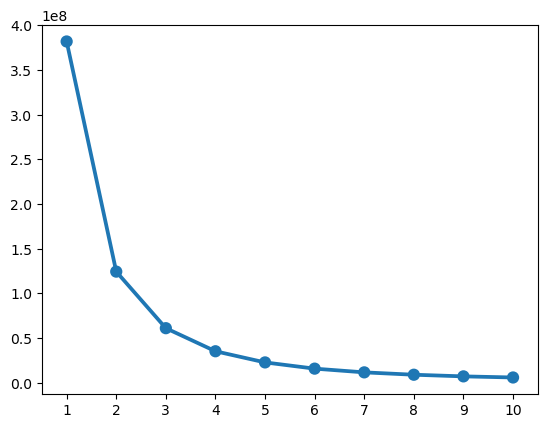

In [73]:
from sklearn.cluster import KMeans
SSE = []
for k in range(0,10):
    kmeans = KMeans(n_clusters=k+1,random_state=43).fit(model)
    SSE.append(kmeans.inertia_)
sns.pointplot(x=list(range(1,11)),y=SSE)
plt.show()

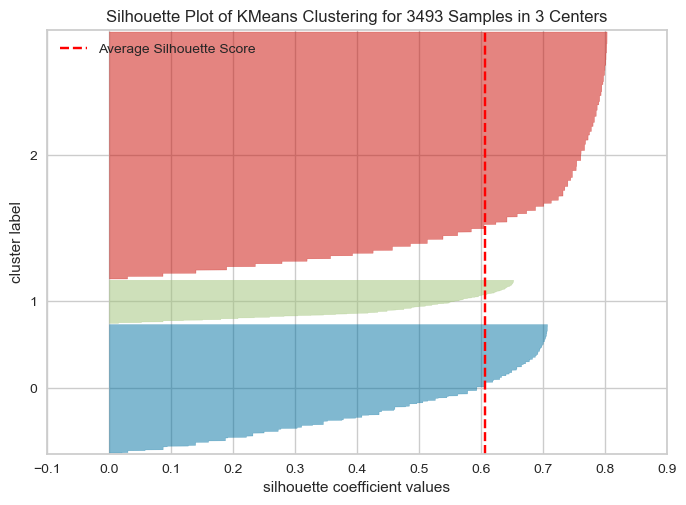

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3493 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=43))

In [74]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(3, random_state=43),model, colors='yellowbrick')

In [75]:
kmeans = KMeans(n_clusters=3,random_state=43).fit(model)

In [76]:
model_table['cluster'] = kmeans.labels_

# Result and Interpretation

## Shopping Behavior

In [77]:
model_table.groupby('cluster').agg({'recency':['mean','min','max']
                             ,'monetary':['mean','min','max'],'customer_id':['count']}).reset_index()

cluster     recency               monetary                   customer_id
                 mean  min  max         mean     min       max       count
0       0   89.080224   57  140  5900.432174   71.49  15091.91        1072
1       1  192.016667  141  353  3972.985972   60.34  10936.20         360
2       2   23.900049    0   56  6889.208370  142.98  19071.32        2061

In [78]:
model_table.groupby('cluster').agg({'recency':['mean','min','max']
                             ,'monetary':['mean','min','max'],'customer_id':['count']}).reset_index().to_excel('cluster_rm.xlsx')

Cluster : 0

**Average Customer**

RFM Characteristic : Average customer with  money spending normally

Business Recommendation : to decrease recency and increase monetary we can implemented loyalty program

Cluster : 1

**Churn Customer**

RFM Characteristic : Old customer with low money spending

Business Recommendation : research why they don't use out service again

Cluster : 2

**Best Customer**

RFM Characteristic : Recent customer with high money spending

Business Recommendation : Offering and testing new product to encourage their hobby

In [79]:
average_customer = model_table[model_table['cluster']==0]
churn_customer = model_table[model_table['cluster']==1]
best_customer = model_table[model_table['cluster']==2]

## Demographic

In [80]:
model_table.groupby('cluster').agg({'age':['mean','min','max']}).reset_index()

cluster        age            
                mean   min   max
0       0  44.683769  20.0  79.0
1       1  45.002778  21.0  87.0
2       2  44.882096  20.0  91.0

customer have an average age in 43-44 years

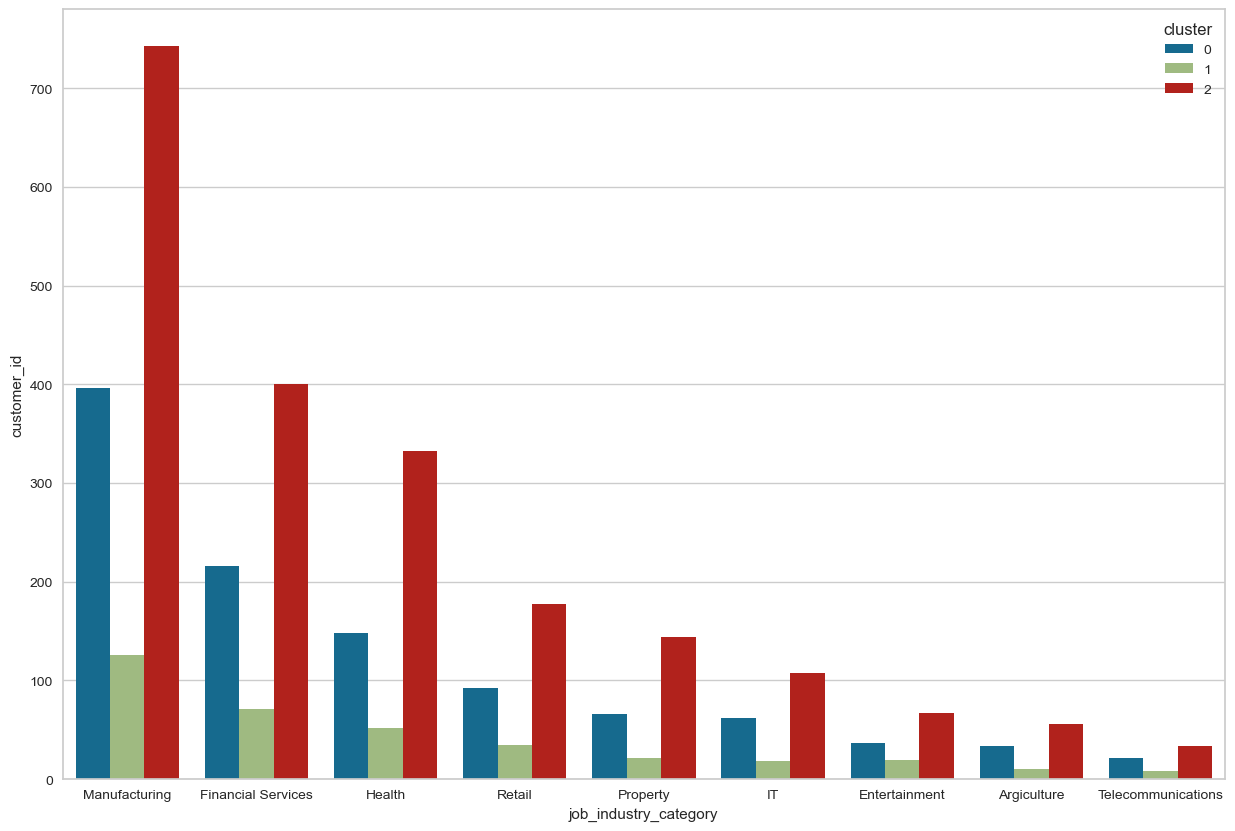

In [81]:
job_industry = model_table.groupby(['cluster','job_industry_category'])['customer_id'].count().reset_index().sort_values('customer_id',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='job_industry_category',y='customer_id',hue='cluster',data=job_industry)
plt.show()

Manufacturing, Financial Services and Health is job industrial our customer

Business Recommendation :

Direct marketing promotion in manufacturing, financial service and health

cooperate project with industry

Advertising in thats industry

## Geographic

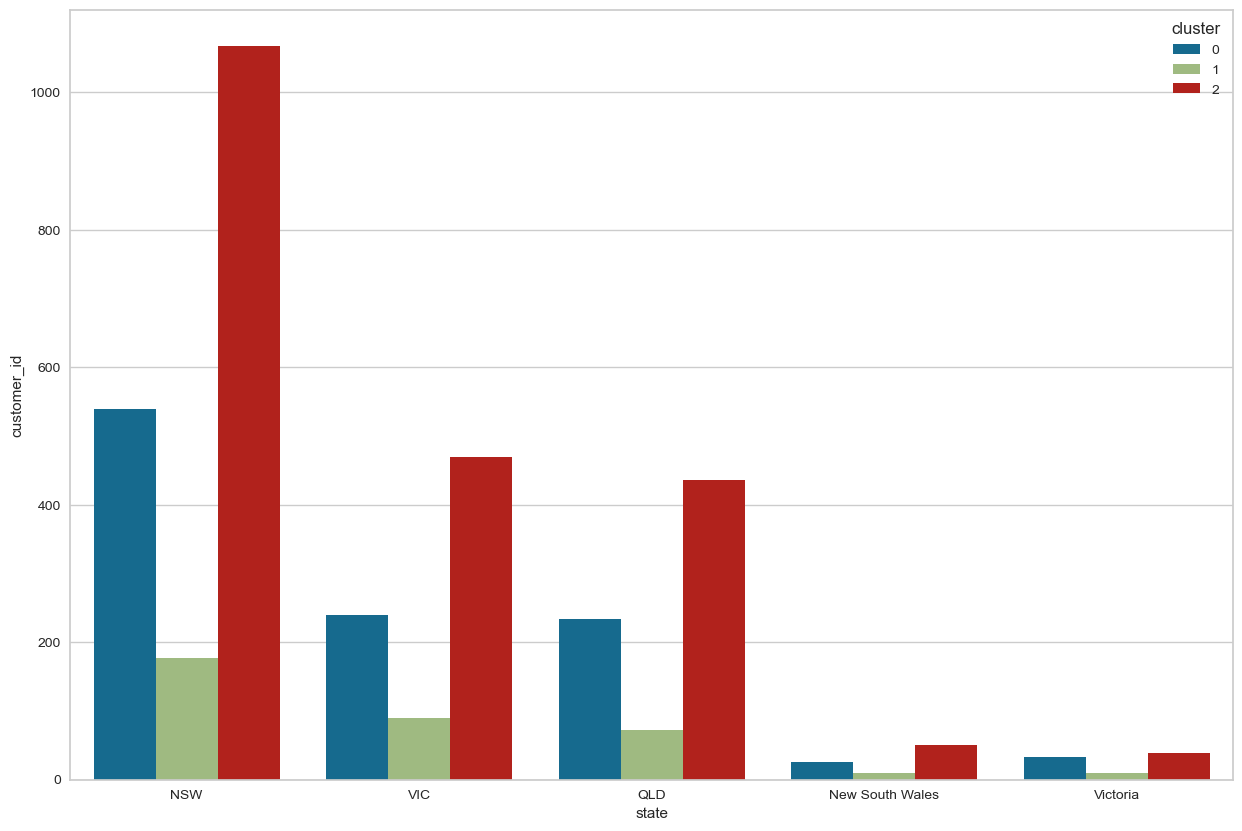

In [82]:
state = model_table.groupby(['cluster','state'])['customer_id'].count().reset_index().sort_values('customer_id',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='state',y='customer_id',hue='cluster',data=state)
plt.show()

Dominant Customer have demographic in NSW

Focused marketing offering new product  in NSW because that base our loyal customer

## Psycometrics

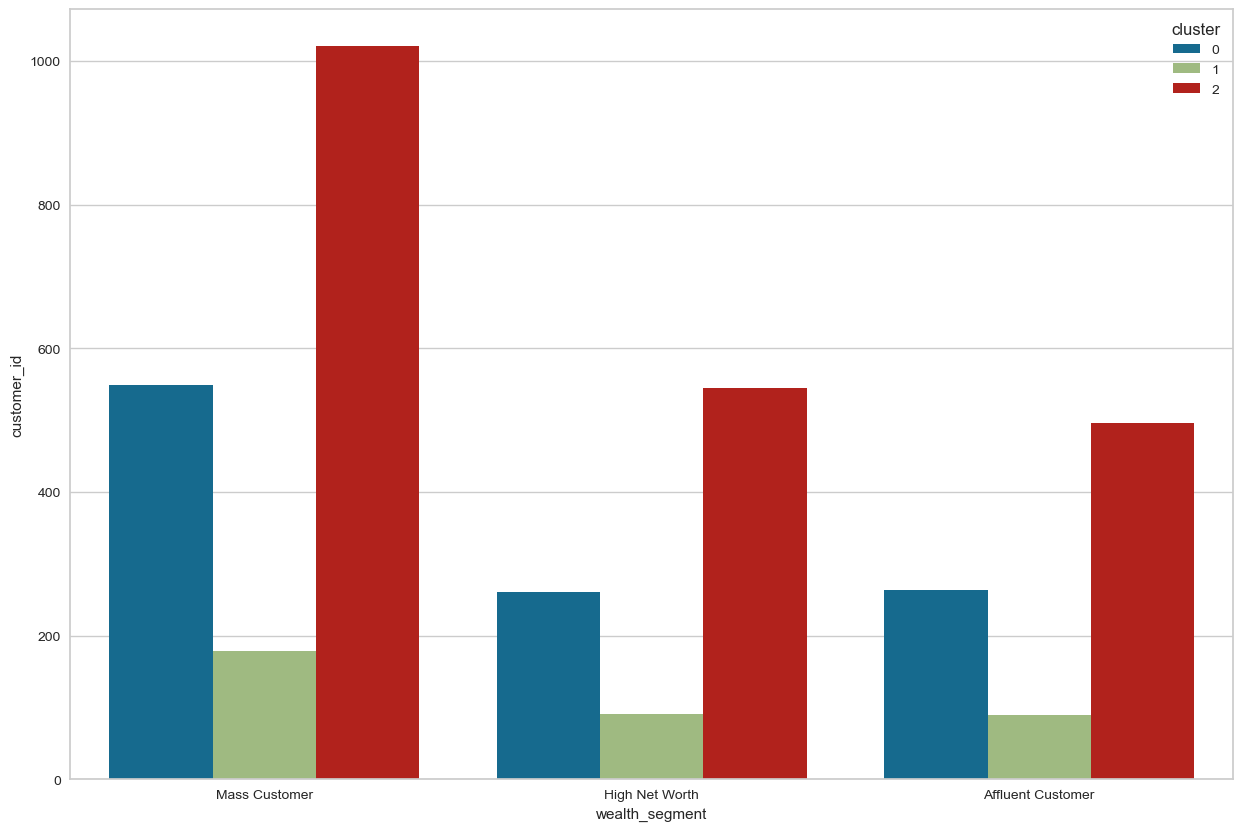

In [83]:
wealth_segment = model_table.groupby(['cluster','wealth_segment'])['customer_id'].count().reset_index().sort_values('customer_id',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='wealth_segment',y='customer_id',hue='cluster',data=wealth_segment)
plt.show()

Mass customer dominated all clusters

# Export Table to Develop Dashboard

In [88]:
model_table.columns

Index(['customer_id', 'monetary', 'transaction_date', 'recency', 'frequency',
       'age', 'state', 'wealth_segment', 'job_industry_category', 'cluster'],
      dtype='object')

In [89]:
model_table['cluster'] = model_table['cluster'].replace({0:'Average Customer',1:'Churn Customer',2:'Best Customer'})

In [91]:
add_table = model_table[['frequency','recency','monetary','cluster','customer_id']]

In [92]:
table_agg = table_agg.merge(add_table,how='left',on='customer_id')

In [95]:
table_agg

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,frequency,recency,monetary,cluster
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,67.0,3,75,1953.15,Average Customer
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,43.0,7,20,7351.70,Best Customer
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,N,No,22.0,45.0,6,56,8148.22,Best Customer
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,No,16.0,60.0,7,121,7539.81,Average Customer
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Affluent Customer,N,Yes,2.0,26.0,10,75,11292.54,Average Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19816,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,Manufacturing,Mass Customer,N,Yes,7.0,28.0,5,26,6164.88,Best Customer
19817,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,Financial Services,Mass Customer,N,No,19.0,48.0,10,23,9949.62,Best Customer
19818,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,Telecommunications,High Net Worth,N,No,14.0,48.0,7,34,7556.94,Best Customer
19819,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,Financial Services,Mass Customer,N,Yes,20.0,67.0,4,51,3651.92,Best Customer


In [98]:
table_agg['state'].unique()

array(['Victoria', 'New South Wales', 'Queensland', nan], dtype=object)

In [97]:
table_agg['state'] = table_agg['state'].replace({'VIC':'Victoria','NSW':'New South Wales',
                                                'QLD':'Queensland'})

In [101]:
table_agg = table_agg.dropna()

In [102]:
table_agg.to_csv('table_aggregate.csv')